__import libraries:__
below are all the libraries used in this project

# The main project 

In [672]:
import datetime
import warnings
from collections import Counter
warnings.filterwarnings("ignore")

#data manipulation
import pandas as pd 
import numpy as np

#plotting
%matplotlib inline 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#modeling
from imblearn.over_sampling import RandomOverSampler 

from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, confusion_matrix, classification_report, accuracy_score

import joblib# to save the model


#Note!: if any of the packages or libraries  not work please use the following command => !pip install library_name



__Reading the file and its properties__


In [839]:
pd.set_option('display.max_columns', None)# to show all the columns
df = pd.read_csv('project_dataset.csv') 
print('shape is {}: '.format(df.shape))
print(df.dtypes)
print('\n')
df.sample(10)

shape is (119390, 32): 
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent     

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
108992,City Hotel,0,111,2017,April,14,3,1,1,2,0.0,0,BB,ISR,Groups,TA/TO,0,0,0,A,A,0,No Deposit,37.0,NaN,0,Transient-Party,95.00,0,1,Check-Out,2017-04-05
55804,City Hotel,0,231,2016,August,35,21,2,2,2,0.0,0,BB,FIN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient-Party,90.95,0,1,Check-Out,2016-08-25
65448,City Hotel,1,73,2017,April,14,3,1,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,20.0,NaN,0,Transient,105.00,0,0,Canceled,2017-01-20
30055,Resort Hotel,0,0,2016,November,46,11,0,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,81.00,1,1,Check-Out,2016-11-13
48816,City Hotel,1,267,2016,March,14,31,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.00,0,0,Canceled,2015-10-21
63424,City Hotel,1,9,2017,February,6,11,2,4,1,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,83.0,NaN,0,Transient,70.40,0,0,Canceled,2017-02-02
110386,City Hotel,0,65,2017,April,17,23,2,2,2,0.0,0,BB,DEU,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,28.0,NaN,0,Transient,89.10,0,0,Check-Out,2017-04-27
32795,Resort Hotel,0,1,2017,February,5,3,0,2,2,1.0,1,HB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,103.00,0,0,Check-Out,2017-02-05
92299,City Hotel,0,136,2016,June,27,30,1,3,2,0.0,0,HB,CZE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,NaN,0,Transient-Party,123.25,0,0,Check-Out,2016-07-04
95187,City Hotel,0,195,2016,August,33,13,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,9.0,NaN,0,Transient,94.50,0,1,Check-Out,2016-08-16


In [674]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [675]:

df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


__there is something here__
there is a lot of thing here must to be considerd and remove such as the company and the agent which are something that we don't want and containg a lot of null values, and also i will compine the date of the first cople of cloumn and maKe it one with datetime data type

# Exploratory Data Analysis(EDA)

- the first graph represent the months and the orders count and canceled per each month 

In [733]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

- the next graph will shows the expected numbers of each features

array([[<AxesSubplot:title={'center':'is_canceled'}>,
        <AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'arrival_date_year'}>,
        <AxesSubplot:title={'center':'arrival_date_week_number'}>],
       [<AxesSubplot:title={'center':'arrival_date_day_of_month'}>,
        <AxesSubplot:title={'center':'stays_in_weekend_nights'}>,
        <AxesSubplot:title={'center':'stays_in_week_nights'}>,
        <AxesSubplot:title={'center':'adults'}>],
       [<AxesSubplot:title={'center':'children'}>,
        <AxesSubplot:title={'center':'babies'}>,
        <AxesSubplot:title={'center':'is_repeated_guest'}>,
        <AxesSubplot:title={'center':'previous_cancellations'}>],
       [<AxesSubplot:title={'center':'previous_bookings_not_canceled'}>,
        <AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,


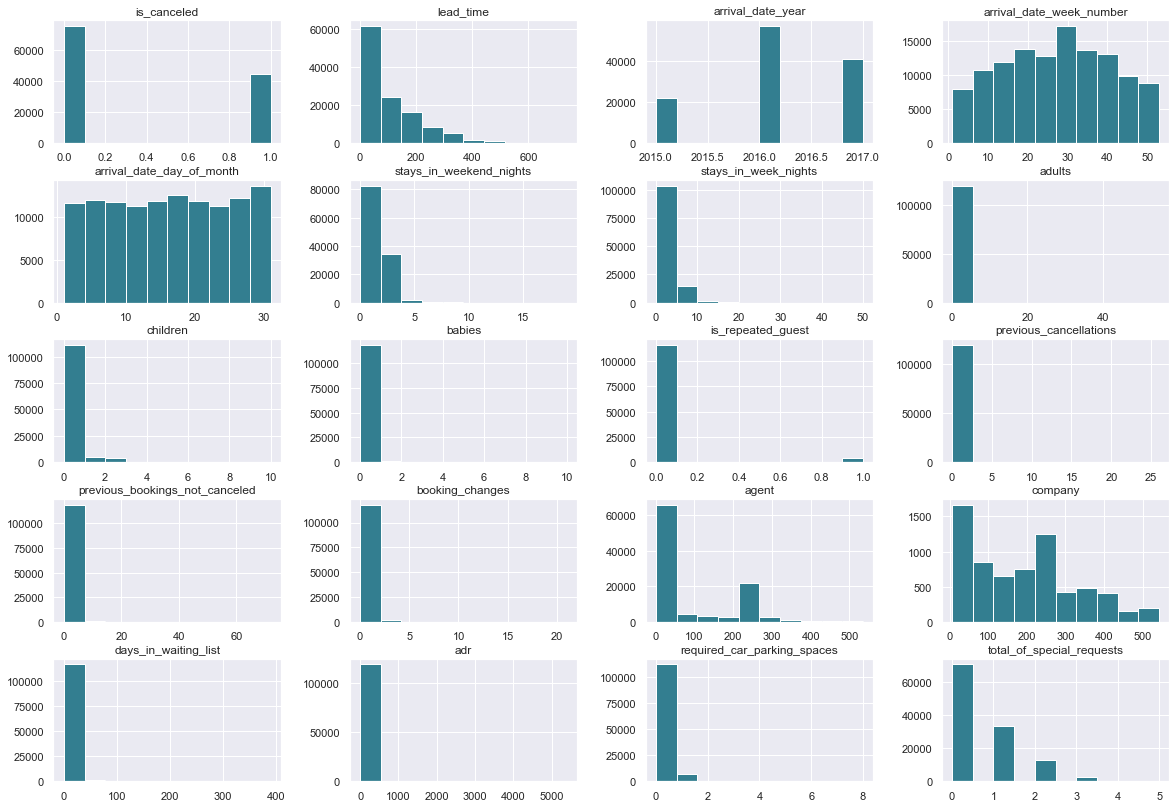

In [753]:
df.hist(figsize=(20,14),color = "#337E90")


<AxesSubplot:xlabel='Months', ylabel='Count'>

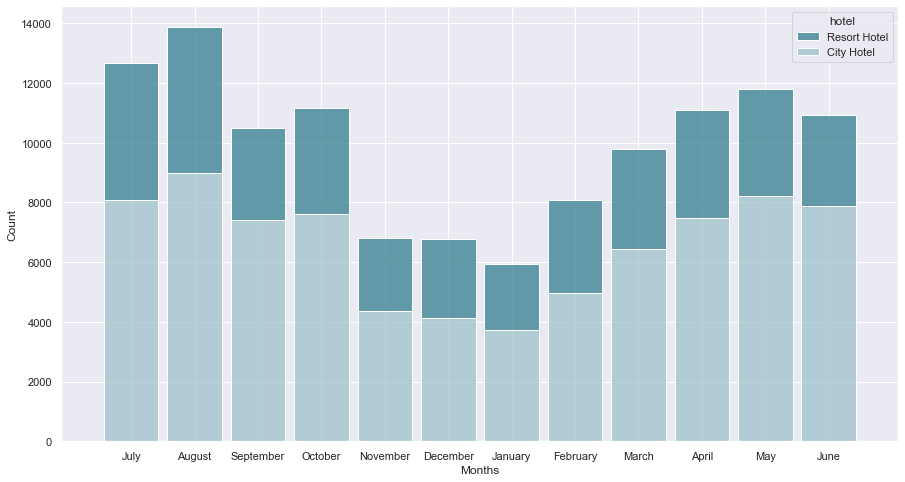

In [765]:
plt.figure(figsize = (15,8))
months_chart = sns.histplot(data= df,x='arrival_date_month', hue= 'hotel',multiple="stack",palette=['#337E90', '#9FC3CB'],)
months_chart.set(xlabel='Months', ylabel='Count')
change_width(months_chart,.86)
sns.color_palette("mako", as_cmap=True)
months_chart
# is_canceled 0 mean not, and 1 means he is 

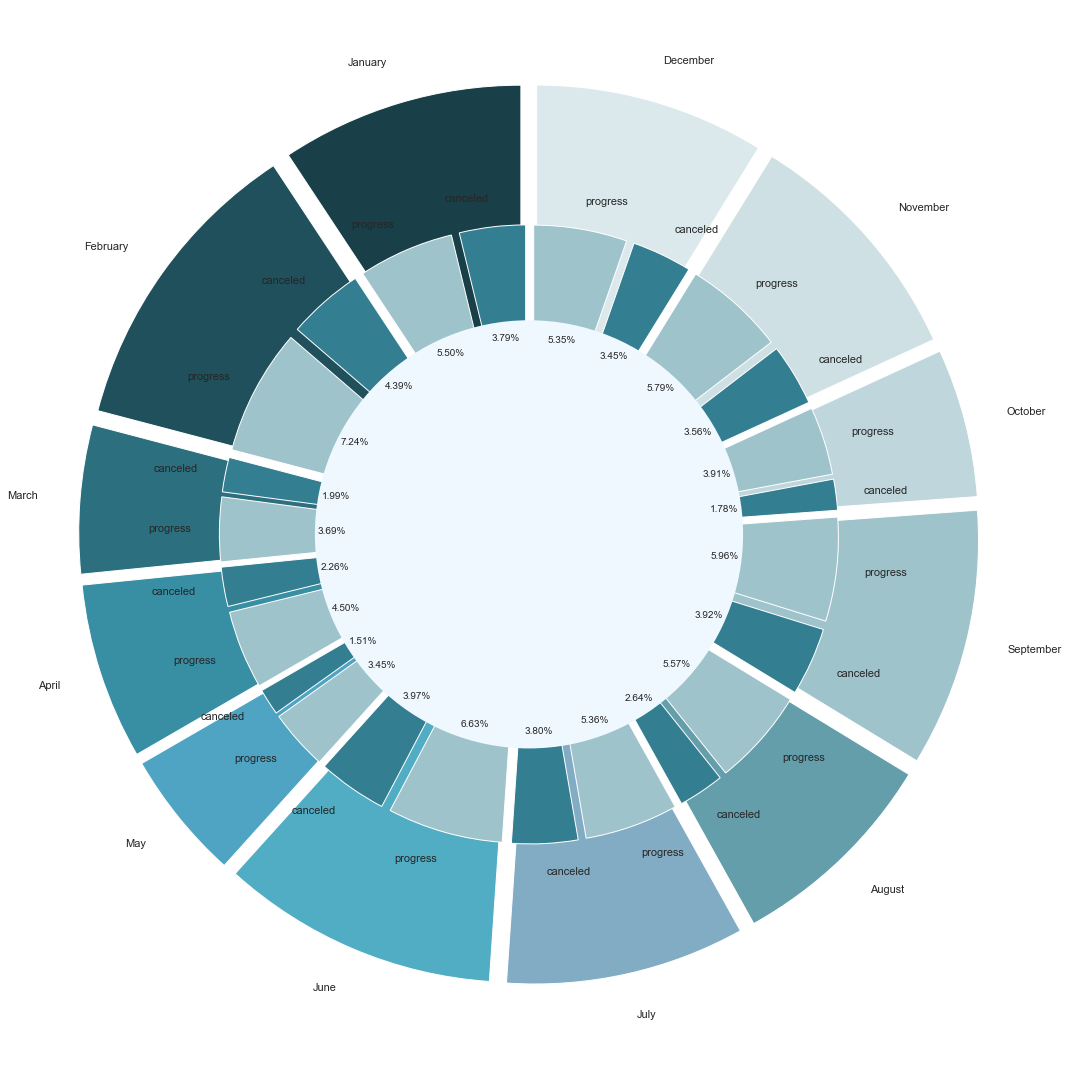

In [840]:
# parmeter using in the constract such as head, colors and specing
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
monthsinner = ['canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress','canceled','progress',]
colors = ['#193F48', '#1F505B', '#2C7080', '#388EA2','#4EA4C2', '#51ADC3', '#82ACC4', '#649EAB','#9FC3CB', '#BED6DC', '#CEE0E4', '#DCE9EC']
colors_inner = ['#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB','#337E90', '#9FC3CB',]
explode = (0.2,0.2,0.2,0.2, 0.2,0.2,0.2,0.2, 0.2,0.2,0.2,0.2) 
explode_inner = (0.2,0.2,0.2,0.2, 0.2,0.2,0.2,0.2, 0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2, 0.2,0.2,0.2,0.2, 0.2,0.2,0.2,0.2)
#collecting data
pie_data_count = df.groupby('arrival_date_month').count()['is_canceled']
pie_data_canceled = df.groupby('arrival_date_month').sum()['is_canceled']
pie_data_countzeros = pie_data_count - pie_data_canceled
innerCercal = []
for i in range(12):
    innerCercal.append(pie_data_canceled[i])
    innerCercal.append(pie_data_countzeros[i])

#Plot
plt.figure(figsize = (15,15))
plt.pie(pie_data_count, labels=months, colors=colors, startangle=90,frame=True, explode=explode,radius=3,)
plt.pie(innerCercal,colors=colors_inner,startangle=90,labels=monthsinner,explode=explode_inner,radius=2 , autopct='%1.2f%%')
#Draw circle
centre_circle = plt.Circle((0,0),1.5,color='#F0F8FF', fc='#F0F8FF',linewidth=6)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()

* the graph below shows the diffrence between the hotel types and how they stays in eaither in weeK days or on weeKends 

<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='hotel'>

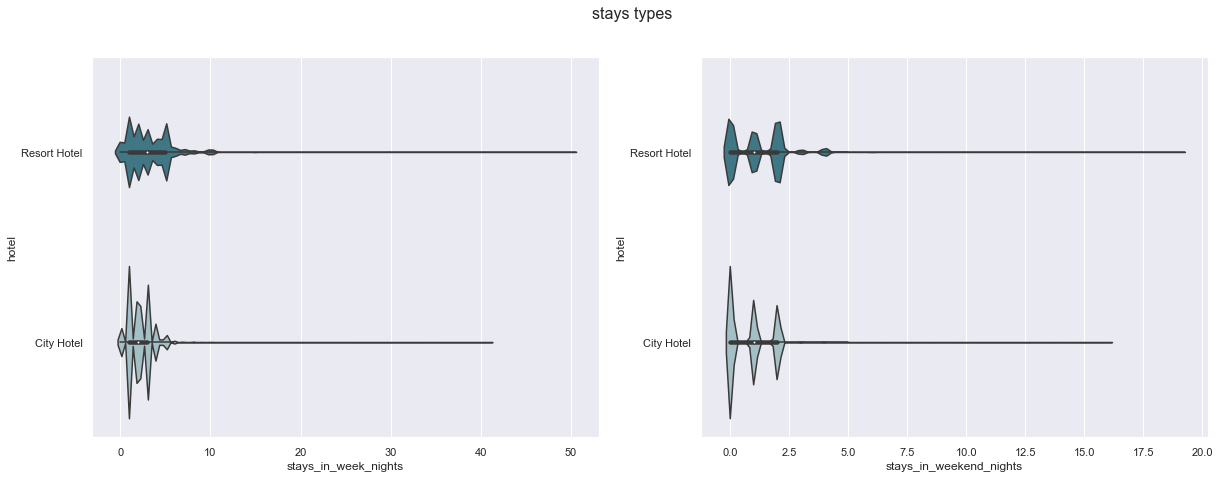

In [766]:
a4_dims = (20, 7)

fig, axs = plt.subplots(figsize=a4_dims,ncols=2)
plt.suptitle('stays types',fontsize = 16)
sns.violinplot(x='stays_in_week_nights',y='hotel',data=df, ax=axs[0],palette=['#337E90', '#9FC3CB'])
sns.violinplot(x='stays_in_weekend_nights',y='hotel',data=df, ax=axs[1],palette=['#337E90', '#9FC3CB'])





<AxesSubplot:xlabel='country', ylabel='count'>

<Figure size 720x504 with 0 Axes>

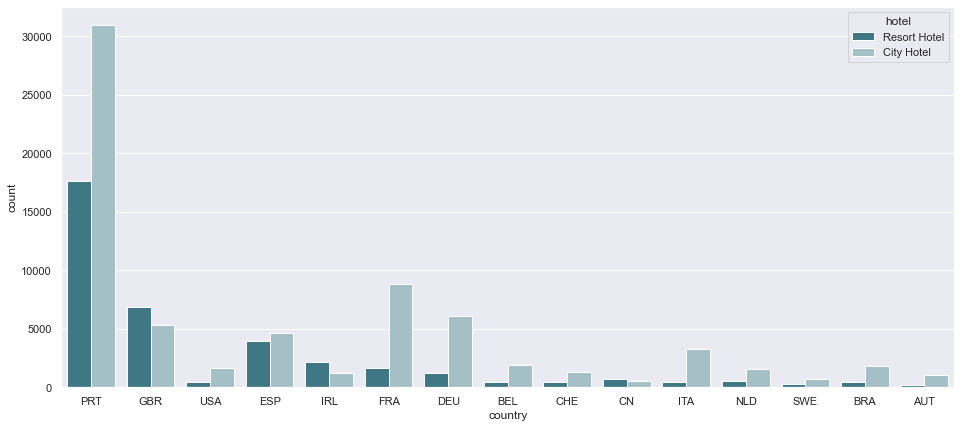

In [764]:
plt.figure(figsize = (10,7))
counts = df['country'].value_counts()
#counts
plt.subplots(figsize=(16,7))
sns.countplot(x='country', hue='hotel',  data=df[df.country.isin(counts[counts > 1000].index)],palette=['#337E90', '#9FC3CB'])

# Preprocessing 

### the graph and list below shows the most correlation features to is_calneled.

<AxesSubplot:>

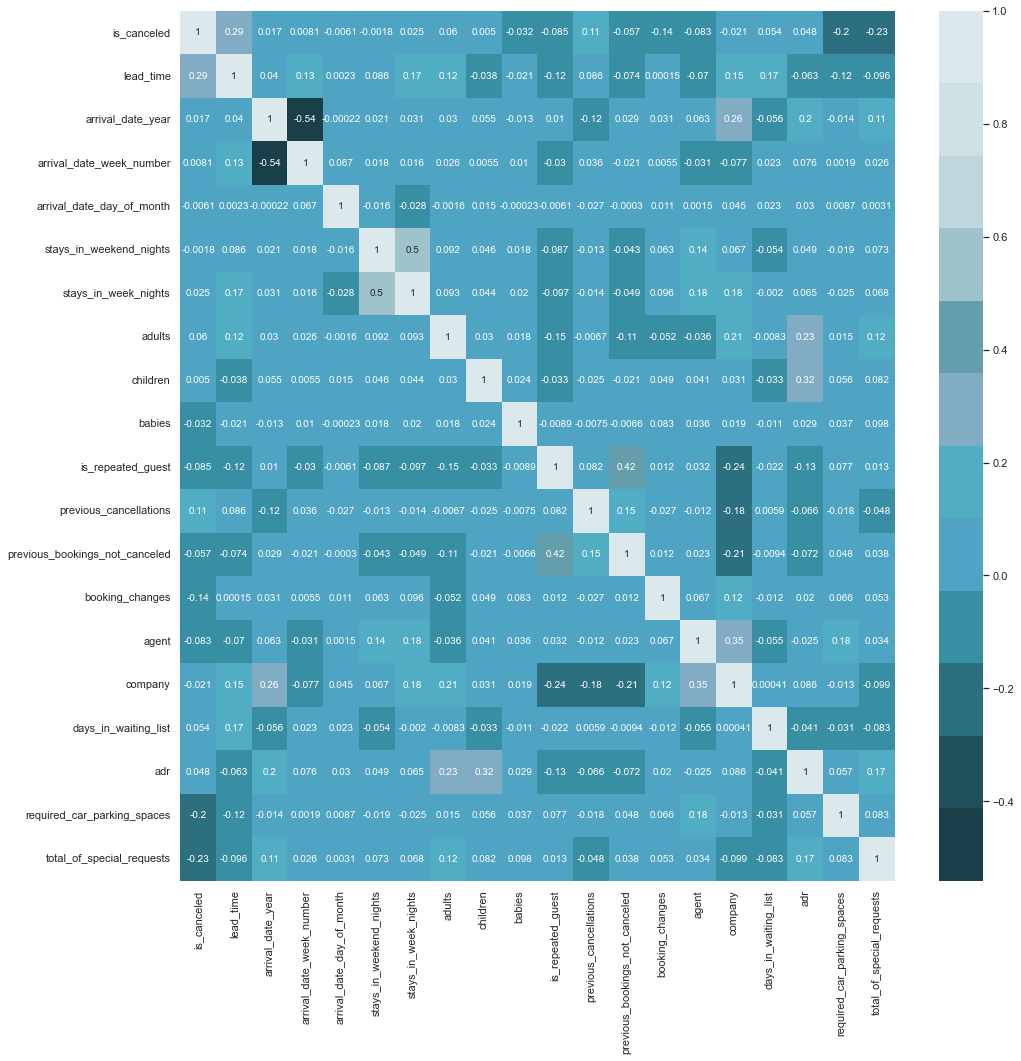

In [771]:
plt.figure(figsize = (16, 16))
sns.heatmap(df.corr(), annot = True, cmap=colors)

In [841]:
corr = df.corr()['is_canceled'].abs().sort_values(ascending = False)#abs will take the absolute value of each feature
corr

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
agent                             0.083114
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
company                           0.020642
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

it's show that

arrival_date_week_number          
arrival_date_day_of_month         
children                          
stays_in_weekend_nights 
have no correlation and we will remove them

In [842]:
# removeing the ooutliers and nullvalue 
df = df[~(df.children.isna())]
df = df[~(df.country.isna())]
df = df[~(df.adults == 0)]


# motheds for converting the object into numbercal represntation 
def check(row):
  if row['hotel'] == 'City Hotel':
    return 0
  elif row['hotel'] == 'Resort Hotel':
    return 1
  else:
    return 2
def check_reservation_status(row):
  if row['reservation_status'] == 'Check-Out':
    return 0
  elif row['reservation_status'] == 'Canceled':
    return 1
  else:
    return 2

def check_customer_type(row):
  if row['customer_type'] == 'Transient':
    return 0
  elif row['customer_type'] == 'Transient-Party':
    return 1
  elif row['customer_type'] == 'Contract':
    return 2
  else:
    return 3

def check_deposit_type(row):
  if row['deposit_type'] == 'No Deposit':
    return 0
  elif row['deposit_type'] == 'Non Refund':
    return 1
  else:
    return 2

def check_deposit_type(row):
  if row['deposit_type'] == 'No Deposit':
    return 0
  elif row['deposit_type'] == 'Non Refund':
    return 1
  else:
    return 2

def check_meal(row):
  if row['meal'] == 'BB':
    return 0
  elif row['meal'] == 'HB':
    return 1
  elif row['meal'] == 'SC':
    return 2
  elif row['meal'] == 'FB':
    return 3
  else:
    return 4
  
def check_market_segment(row):
  if row['market_segment'] == 'Aviation':
    return 0
  elif row['market_segment'] == 'Complementary':
    return 1
  elif row['market_segment'] == 'Corporate':
    return 2
  elif row['market_segment'] == 'Direct_MS':
    return 3
  elif row['market_segment'] == 'Groups':
    return 4
  elif row['market_segment'] == 'Offline TA/TO':
    return 5
  elif row['market_segment'] == 'Online TA':
    return 6
  else:
    return 7

def check_distribution_channel(row):
  if row['distribution_channel'] == 'Corporate':
    return 0
  elif row['distribution_channel'] == 'Direct_dis':
    return 1
  elif row['distribution_channel'] == 'GDS':
    return 2
  elif row['distribution_channel'] == 'TA/TO':
    return 3
  elif row['distribution_channel'] == 'Undefined':
    return 4
  else:
    return 5

df.reservation_status_date = pd.to_datetime(df.reservation_status_date)#convert reservation_status_date columns from object to datetime

# convrt reservation_status_date to sprated columns
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day

# changing the object column to number and using the above methods
df['distribution_channel_no'] = df.apply(check_distribution_channel, axis=1)
df['market_segment_no'] = df.apply(check_market_segment, axis=1)
df['meal_no'] = df.apply(check_meal, axis=1)
df['deposit_type_no'] = df.apply(check_deposit_type, axis=1)
df['customer_type_no'] = df.apply(check_customer_type, axis=1)
df['reservation_status_no'] = df.apply(check_reservation_status, axis=1)
df['htoel_no'] = df.apply(check, axis=1)

df['assigned_reserved_room'] = np.where(df.assigned_room_type == df.reserved_room_type, 1, 0) # 1 means the assigning room is the same as reserved room.

df['arrival_date_month_no'] = df.arrival_date_month.apply(lambda x: datetime.datetime.strptime(x, "%B").month) # convert the month name to its number

df['date'] = df[['arrival_date_year', 'arrival_date_month_no', 'arrival_date_day_of_month']].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")# merge three columns into one
df['date'] = pd.to_datetime(df['date']) #convert it into datetime

df.children = df.children.astype(int)#convert children columns from float to int
#df = df.drop(['arrival_date_week_number','arrival_date_day_of_month','children','stays_in_weekend_nights',], axis=1)
#df = df.drop(['company', 'agent', 'assigned_room_type', 'reserved_room_type','arrival_date_week_number', 'arrival_date_year', 'arrival_date_day_of_month'], axis=1) # drop not useful columns

In [843]:
#dele all the columns that contain object after representing them in numbercal values
not_num_cols = [col for col in df.columns if df[col].dtype == 'O']
not_num_cols.append('reservation_status_date')
not_num_cols.append('date')
df = df.drop(not_num_cols,axis=1)

Now i will remove the data that i thinK it's will be outliers and too far from the others.

 * first i will checK the adults column becuse there are alot of numbers that does not maKe since such as 55. 50,40,24,26 and 20 all of them were have one record so i thinK it's for testing or for somthing liKe that after that
 * and the same thing with the children one of the record was 10 children and i believe this is not correct
 * also the same with babies twice 9 and 10 babies were recorded

 and we will lose 17 rows in total

# Cleaning Part

Now i will remove the data that i thinK it's will be outliers and too far from the others.

 * first i will checK the adults column becuse there are alot of numbers that does not maKe since such as 55. 50,40,24,26 and 20 all of them were have one record so i thinK it's for testing or for somthing liKe that after that
 * and the same thing with the children one of the record was 10 children and i believe this is not correct
 * also the same with babies twice 9 and 10 babies were recorded

 and we will lose 17 rows in total

In [844]:
firstMask = df.adults < 6 # because there is only 14 adult how has more than 6
secondMask = df.children < 6 # because there is only 1 children how has more than 6
thirdMask = df.babies < 6 # because there is only 2 babies how has more than 6
df = df[firstMask & secondMask & thirdMask]

### now the data locKs better now and i thing we can start chosing the best model.
but before that lets checK if the target data is balanced or not

In [845]:
df.is_canceled.value_counts()

# 0 => 63%
# 1 => 37%

0    74449
1    44039
Name: is_canceled, dtype: int64

checKing the null vlaue after cleaning

In [846]:
df.isnull().sum()

is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
agent                              15928
company                           111886
days_in_waiting_list                   0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
year                                   0
month                                  0
day                                    0
distribution_channel_no                0
market_segment_n

In [847]:
df.sample(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,year,month,day,distribution_channel_no,market_segment_no,meal_no,deposit_type_no,customer_type_no,reservation_status_no,htoel_no,assigned_reserved_room,arrival_date_month_no
6991,1,143,2016,29,15,2,7,2,2,1,0,0,0,0,240.0,NaN,0,12.00,0,0,2016,2,24,3,6,0,0,0,1,1,1,7
98376,0,32,2016,40,25,2,2,2,0,0,0,0,0,0,9.0,NaN,0,134.78,0,1,2016,9,29,3,6,0,0,0,0,0,1,9


In [690]:
firstMask = df.adults < 6 # because there is only 14 adult how has more than 6
#secondMask = df.children < 6 # because there is only 1 children how has more than 6
thirdMask = df.babies < 6 # because there is only 2 babies how has more than 6
#df = df[firstMask & secondMask & thirdMask]
df = df[firstMask & thirdMask]

after adding values and convert some column let checK again the corr and see

<AxesSubplot:>

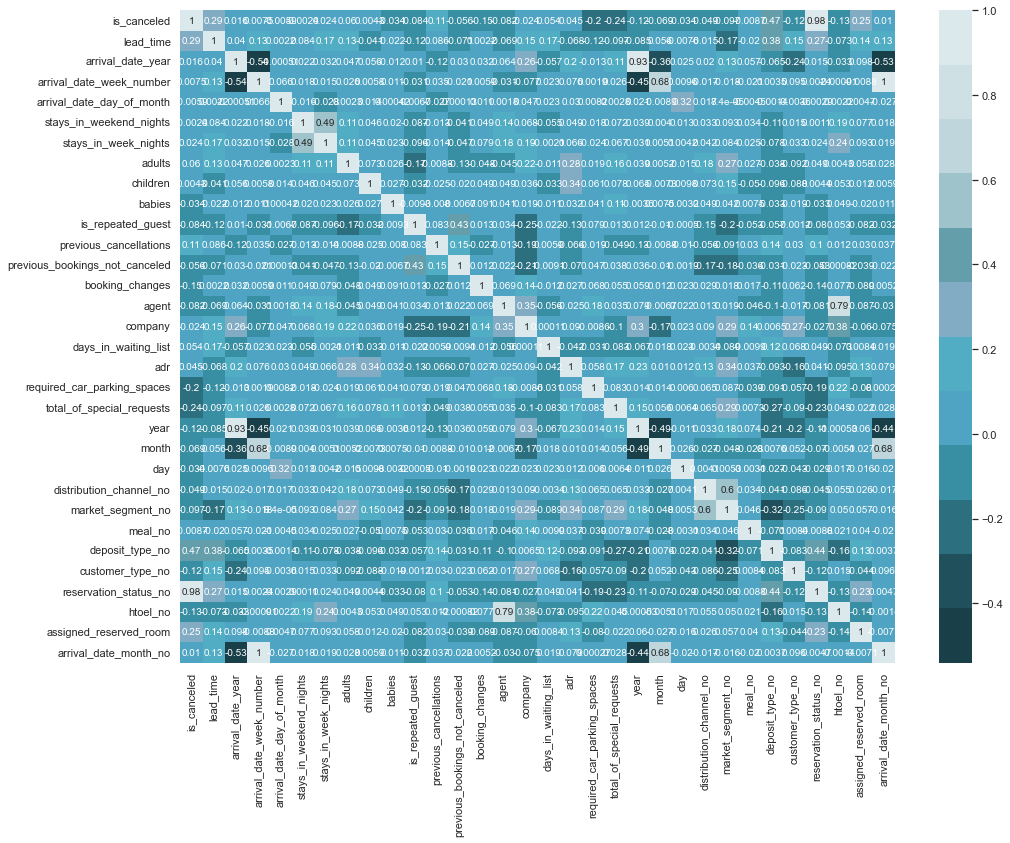

In [848]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, cmap = colors)

In [775]:
corr = df.corr()['is_canceled'].abs().sort_values(ascending = False)#abs will take the absolute value of each feature
corr

is_canceled                       1.000000
reservation_status_no             0.980610
deposit_type_no                   0.468973
lead_time                         0.291708
assigned_reserved_room            0.245648
total_of_special_requests         0.236309
required_car_parking_spaces       0.195175
booking_changes                   0.145167
htoel_no                          0.134707
customer_type_no                  0.123178
year                              0.117578
previous_cancellations            0.109991
market_segment_no                 0.096383
is_repeated_guest                 0.084193
agent                             0.082334
month                             0.069381
adults                            0.056808
previous_bookings_not_canceled    0.055549
days_in_waiting_list              0.054167
distribution_channel_no           0.048852
adr                               0.044849
day                               0.033839
babies                            0.032657
stays_in_we

, 'arrival_date_month_no', 'Aviation', 'GDS', 'date', 'company', 'stays_in_week_nights', 'Offline TA/TO', 'babies', 'Complementary', 

One of the importent steps is to remove reservation_status_no feature becuse it's corr to the target

In [849]:
df=df.drop(['company', 'agent','reservation_status_no', 'stays_in_weekend_nights', 'children', 'meal_no','arrival_date_day_of_month', 'arrival_date_week_number'], axis=1)

### now the data locKs better now and i thing we can start chosing the best model.
but before that lets checK if the target data is balanced or not

In [850]:
df.is_canceled.value_counts()

# 0 => 63%
# 1 => 37%

0    74449
1    44039
Name: is_canceled, dtype: int64

checKing the null vlaue after cleaning

In [851]:
df.isnull().sum()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
stays_in_week_nights              0
adults                            0
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
year                              0
month                             0
day                               0
distribution_channel_no           0
market_segment_no                 0
deposit_type_no                   0
customer_type_no                  0
htoel_no                          0
assigned_reserved_room            0
arrival_date_month_no             0
dtype: int64

# Model

Now I will define the target value and the data and since there is problem with the uniqueness of the data, and when I implied the duplicated mtheod i notice that there are arround 33% of the data were duplicated and for that i notice other thing which is there is no id or uniqe vlaue to specifiy each record and i thinK the duplicated happed because there might some people have the same value but that does not mean they are duplacated. and for that i will create another dataset for the duplacted value and i will test it in the final to see the diffrence between them.



In [697]:
df.sample(14)

,is_canceled,lead_time,arrival_date_year,stays_in_week_nights,adults,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,year,month,day,distribution_channel_no,market_segment_no,deposit_type_no,customer_type_no,htoel_no,assigned_reserved_room,arrival_date_month_no
112674,0,151,2017,4,1,0,0,0,0,1,0,187.00,0,3,2017,5,27,3,6,0,0,0,1,5
31638,0,62,2016,2,2,0,0,0,0,0,0,150.00,0,1,2017,1,2,5,7,0,0,1,1,12
62950,1,61,2017,2,2,0,0,0,0,0,0,80.00,0,0,2016,11,25,3,4,1,0,0,1,1
36625,0,77,2017,7,2,0,0,0,0,0,0,124.00,0,2,2017,5,25,3,6,0,0,1,1,5
33932,0,1,2017,0,2,0,0,0,0,0,0,60.00,0,0,2017,3,7,5,7,0,0,1,0,3
86093,0,77,2016,2,2,0,0,0,0,0,0,109.80,0,0,2016,3,27,3,6,0,0,0,0,3
38072,0,185,2017,6,2,0,0,0,0,0,0,110.00,0,1,2017,7,9,3,6,0,0,1,1,7
104253,0,49,2017,3,2,0,0,0,0,0,0,105.90,0,2,2017,1,9,3,6,0,0,0,1,1
6760,1,20,2016,3,2,0,0,0,0,0,0,129.00,0,0,2016,6,10,3,6,0,0,1,1,6
31635,0,73,2016,2,2,0,0,0,0,0,0,176.00,1,1,2017,1,2,5,7,0,0,1,0,12


In [852]:
# data without duplicated
no_duplicated_data = df.drop_duplicates()
#data_nodup = no_duplicated_data.drop(columns=['is_canceled', 'hotel','meal','country','market_segment','distribution_channel','deposit_type','customer_type','reservation_status','reservation_status_date','date', 'arrival_date_month',], axis=1)
data_nodup = no_duplicated_data.drop(columns=['is_canceled'],axis=1)
targer_nodup = no_duplicated_data['is_canceled']

#splotting the data
#data = df.drop(columns = ['is_canceled', 'hotel','meal','country','market_segment','distribution_channel','deposit_type','customer_type','reservation_status','reservation_status_date','date', 'arrival_date_month',], axis=1)
data = df.drop(columns = ['is_canceled'],axis=1)
target = df['is_canceled']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)
scaled_features_df = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)
scaled_features_df
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=1) # the traing size will be 80% while the test size is 20%
print(data.shape)
print(target.shape)
print(y_train.shape)
print(y_test.shape)

(118488, 23)
(118488,)
(94790,)
(23698,)


In [699]:
print(y_train.value_counts())
print(y_test.value_counts())

0    59620
1    35170
Name: is_canceled, dtype: int64
0    14829
1     8869
Name: is_canceled, dtype: int64


After splitting the data we will try for every classifcation model and test the scores and see what is the best score for this model.

In [882]:
conf_colors = ['#193F48', '#1F505B', '#2C7080', '#388EA2','#4EA4C2', '#51ADC3', '#82ACC4', '#649EAB','#9FC3CB', '#BED6DC', '#CEE0E4', '#DCE9EC']
conf_colors.reverse()
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap=conf_colors);

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

# Logistic Regression

In [878]:
LR = LogisticRegression()
LR.fit(X_train,y_train) 

LogisticRegression()


The Training Score: 92.66378309948307 

The Accuracy is : 0.9254367457169381




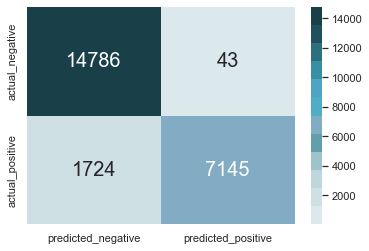

In [883]:
y_predict_LR = LR.predict(X_test)
acc_LR = accuracy_score(y_test, y_predict_LR)
print("\nThe Training Score: {} \n".format(LR.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_LR) )
cm_LR = conf_matrix(y_test, y_predict_LR)

# Gaussian Naive Bayes

In [856]:
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()


The Training Score: 54.94883426521785 

The Accuracy is : 0.5506793822263483




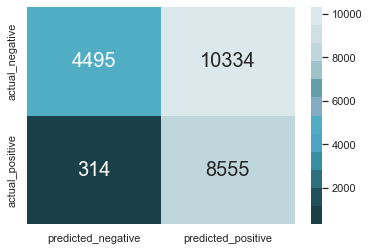

In [857]:
y_predict_GNB = GNB.predict(X_test)
acc_GNB = accuracy_score(y_test, y_predict_GNB)
print("\nThe Training Score: {} \n".format(GNB.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_GNB) )
cm_GNB = conf_matrix(y_test, y_predict_GNB)

# Random Forest Classifier

In [884]:
RFC = RandomForestClassifier(n_estimators=11,random_state=1)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=11, random_state=1)


The Training Score: 99.64869711994936 

The Accuracy is : 0.9416828424339607


              precision    recall  f1-score   support

           0       0.93      0.98      0.95     14829
           1       0.96      0.88      0.92      8869

    accuracy                           0.94     23698
   macro avg       0.95      0.93      0.94     23698
weighted avg       0.94      0.94      0.94     23698



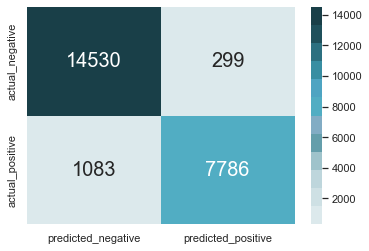

In [887]:
y_predict_RFC = RFC.predict(X_test)
acc_RFC = accuracy_score(y_test, y_predict_RFC)
print("\nThe Training Score: {} \n".format(RFC.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_RFC) )
cm_RFC = conf_matrix(y_test, y_predict_RFC)
print(classification_report(y_test, y_predict_RFC))

# Decision Trees Classifier

In [860]:
DT = DecisionTreeClassifier(max_depth=10)
DT.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)


The Training Score: 84.12596265428843 

The Accuracy is : 0.8371592539454806




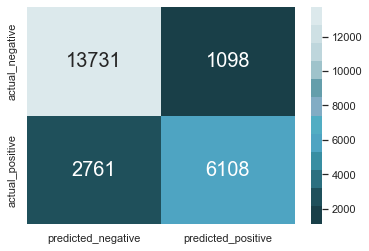

In [861]:
y_predict_DT = DT.predict(X_test)
acc_DT = accuracy_score(y_test, y_predict_DT)
print("\nThe Training Score: {} \n".format(DT.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_DT) )
cm_DT = conf_matrix(y_test, y_predict_DT)

# K Neighbors Classifier

In [862]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [863]:
y_predict_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_predict_knn)
print("\nThe Training Score: {} \n".format(knn.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_knn) )
cm_knn = conf_matrix(y_test, y_predict_knn)

KeyboardInterrupt: 

# Bagging Classifier

In [712]:
BC = BaggingClassifier(base_estimator=SVC(),n_estimators=3, random_state=0)
BC.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=3, random_state=0)


The Training Score: 93.12374723072054 

The Accuracy is : 0.8028947590513967




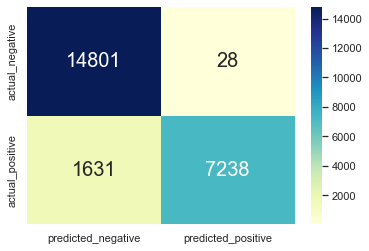

In [713]:
y_predict_BC = BC.predict(X_test)
scores.append(BC.score(X_train,y_train)*100)
print("\nThe Training Score: {} \n".format(BC.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_BC) )
cm_BC = conf_matrix(y_test, y_predict_BC)

# Extra Trees Classifier

In [864]:
ETC = ExtraTreesClassifier(n_estimators=5, random_state=0)
ETC.fit(X_train,y_train)

ExtraTreesClassifier(n_estimators=5, random_state=0)


The Training Score: 99.99367021837746 

The Accuracy is : 0.9375896700143472




'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95     14829\n           1       0.95      0.88      0.91      8869\n\n    accuracy                           0.94     23698\n   macro avg       0.94      0.93      0.93     23698\nweighted avg       0.94      0.94      0.94     23698\n'

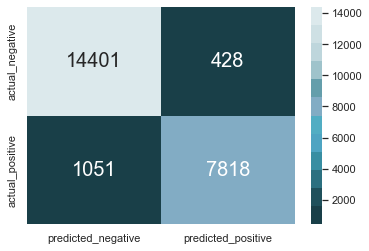

In [865]:
y_predict_ETC = ETC.predict(X_test)
acc_ETC = accuracy_score(y_test, y_predict_ETC)
print("\nThe Training Score: {} \n".format(ETC.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_ETC) )
cm_ETC = conf_matrix(y_test, y_predict_ETC)
classification_report(y_test, y_predict_ETC)


# Support Vector Classifier

In [716]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])


The Training Score: 93.09526321341913 

The Accuracy is : 0.9292345345598785




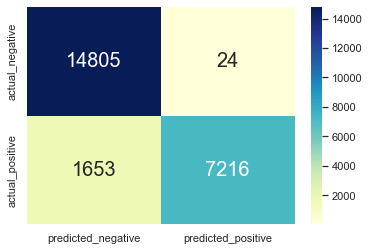

In [717]:
y_predict_clf = clf.predict(X_test)
acc_clf = accuracy_score(y_test, y_predict_clf)
print("\nThe Training Score: {} \n".format(clf.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_clf) )
cm_clf = conf_matrix(y_test, y_predict_clf)

# Gradient Boosting Classifier

In [866]:
GBC=GradientBoostingClassifier(n_estimators=10,learning_rate=0.5,max_depth=6, random_state=1)
GBC.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=6, n_estimators=10,
                           random_state=1)


The Training Score: 92.07089355417239 

The Accuracy is : 0.9172504008777111




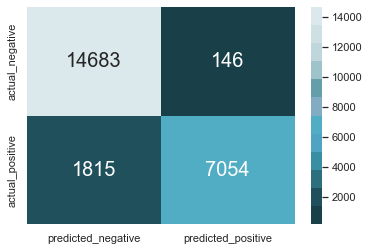

In [867]:
y_predict_GBC = GBC.predict(X_test)
acc_GBC = accuracy_score(y_test, y_predict_GBC)
print("\nThe Training Score: {} \n".format(GBC.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_GBC) )
cm_GBC = conf_matrix(y_test, y_predict_GBC)

# SGDC

In [868]:
SGDC = make_pipeline(StandardScaler(),SGDClassifier(max_iter=500, tol=1e-3))
SGDC.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(max_iter=500))])


The Training Score: 92.68488237155819 

The Accuracy is : 0.9262385011393367




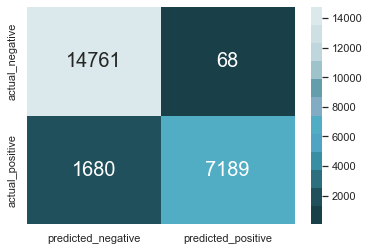

In [869]:
y_predict_SGDC = SGDC.predict(X_test)
acc_SGDC = accuracy_score(y_test, y_predict_SGDC)
print("\nThe Training Score: {} \n".format(SGDC.score(X_train,y_train)*100))
print('The Accuracy is : {}\n\n'.format(acc_SGDC) )
cm_SGDC = conf_matrix(y_test, y_predict_SGDC)

# Compairing Models

In [870]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression','Gradient Boosting','Support Vector', 'Extra Trees', 'Bagging', 'K Neighbors', 'Random Forest', 'Gaussian Naive Bayes', 'SGDClassifier'],
    'Score' : [acc_LR,acc_GBC, acc_clf, acc_ETC, acc_BC, acc_knn, acc_RFC, acc_GNB, acc_SGDC]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
6,Random Forest,0.941683
3,Extra Trees,0.937590
2,Support Vector,0.929235
8,SGDClassifier,0.926239
0,Logistic Regression,0.925437
1,Gradient Boosting,0.917250
5,K Neighbors,0.881186
4,Bagging,0.802895
7,Gaussian Naive Bayes,0.550679


In [871]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'ggplot2', title = 'Models Comparison')

# Conclution 

### We got high Accuracy and the highest one is Random Forest Classifier which got score 94.2% which is impresive. 

The Result can or the classification report:

                 precision    recall  f1-score   support

           0       0.93      0.98      0.95     14829
           1       0.96      0.88      0.92      8869

    accuracy                           0.94     23698
    macro avg      0.95      0.93      0.94     23698
    weighted avg   0.94      0.94      0.94     23698


And the convolution matrix is:

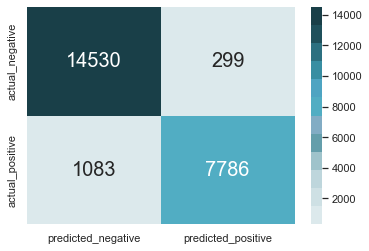

In [889]:
cm_RFC = conf_matrix(y_test, y_predict_RFC)

### Saving the model

In [872]:
filename = 'final_model.sav'
joblib.dump(RFC, filename)

['final_model.sav']

# THE END